<a href="https://colab.research.google.com/github/lucaseduardo79/le79repo/blob/master/SimulacaoMonteCarlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np  
import pandas as pd  
from pandas_datareader import data as wb  
import matplotlib.pyplot as plt  
from scipy.stats import norm
%matplotlib inline

ticker = 'ITUB4.SA'
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2000-1-1')['Adj Close']

log_returns = np.log(1 + data.pct_change())
u = log_returns.mean()
var = log_returns.var()
drift = u - (0.5 * var)
stdev = log_returns.std()

drift.values
stdev.values

t_intervals = 250
iterations = 10

daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

***

Create a variable S0 equal to the last adjusted closing price of Microsoft. Use the “iloc” method.

In [ ]:
S0 = data.iloc[-1]
S0

ITUB4.SA    26.030001
Name: 2020-08-06 00:00:00, dtype: float64

Create a variable price_list with the same dimension as the daily_returns matrix. 

In [ ]:
price_list = np.zeros_like(daily_returns)
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
price_list[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Set the values on the first row of the price_list array equal to S0.

In [ ]:
price_list[0] = S0
price_list

array([[26.03000069, 26.03000069, 26.03000069, ..., 26.03000069,
        26.03000069, 26.03000069],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

Create a loop in the range (1, t_intervals) that reassigns to the price in time t the product of the price in day (t-1) with the value of the daily returns in t.

In [ ]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

In [ ]:
price_list

array([[26.03000069, 26.03000069, 26.03000069, ..., 26.03000069,
        26.03000069, 26.03000069],
       [26.01606996, 25.70498484, 25.62607585, ..., 25.21971111,
        26.05023725, 27.37105578],
       [26.52134544, 25.75589704, 25.23397982, ..., 24.39468568,
        25.59841742, 27.49588307],
       ...,
       [15.78781569, 18.43084474, 19.3373463 , ..., 21.50335783,
        35.89999616, 25.98448276],
       [16.30563288, 18.84192485, 19.72772615, ..., 21.22014712,
        36.37609225, 26.25809097],
       [16.06124362, 18.33980726, 20.04494961, ..., 21.2799169 ,
        35.77078005, 26.1399412 ]])

Finally, plot the obtained price list data.

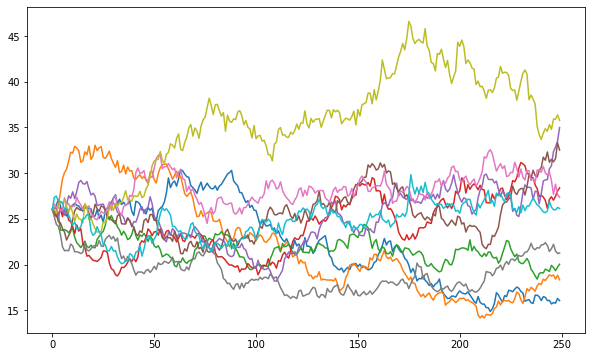

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(price_list);